# Technique Assignment 4: Principal component analysis
## Cogs Spring 2020
### Due: Friday May 22 11:59pm
### 100 points total
### Er Lin - A16140839

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

# Part 1

In [10]:
## Load Fisher's iris dataset
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
## Take the transpose of the data so PCA works out nicely
irisInputs = iris.data.T
m,n = irisInputs.shape
print("m =",m, "n =",n)

m = 4 n = 150


#### 1. Histogram plots

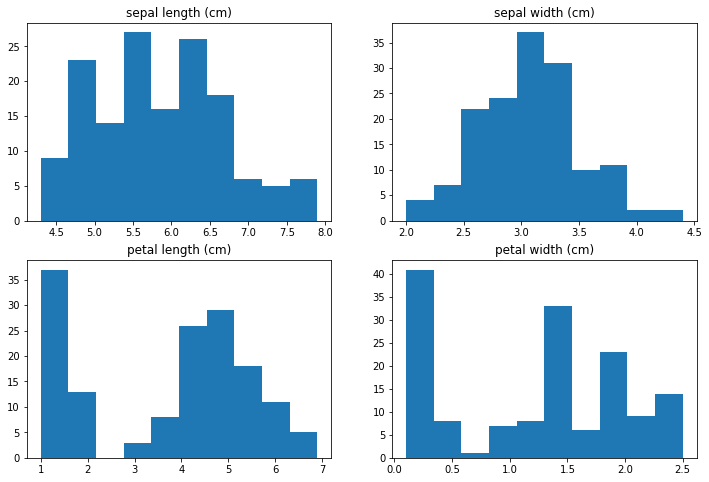

In [18]:
fig , axes = plt.subplots(2,2, figsize=(12,8))
axes[0,0].hist(irisInputs[0])
axes[0,0].set_title('sepal length (cm)')

axes[0,1].hist(irisInputs[1])
axes[0,1].set_title('sepal width (cm)')

axes[1,0].hist(irisInputs[2])
axes[1,0].set_title('petal length (cm)')

axes[1,1].hist(irisInputs[3])
axes[1,1].set_title('petal width (cm)');

#### 2. Find the mean of the data

In [26]:
means = np.mean(irisInputs, axis=1)
print('means: ' + str(means))

means: [5.84333333 3.05733333 3.758      1.19933333]


#### 3. Create Z, the zero-meaned data matrix

In [34]:
## Create Z, the zero-meaned data matrix
Z = irisInputs - np.tile(means, (n,1)).T
Z.shape

(4, 150)

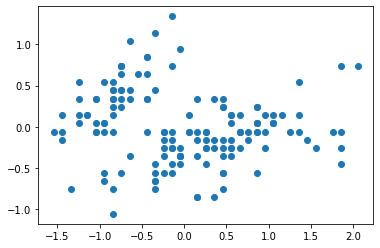

In [80]:
## Plot 2 dimensions of Z to make sure it's centered around 0 (optional)
plt.plot(Z[0],Z[1],'o');

#### 4. Calculate the covariance matrix of Z

In [48]:
C = np.matmul(Z,Z.T)/(n-1)
print('Size: ' + str(C.shape))
print('Covariance Matrix:')
print(C)

Size: (4, 4)
Covariance Matrix:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


#### 5. Using the covariance matrix C, answer these questions: 
a. Which dimension has the greatest variance? <br>
   petal length (cm) <br> <br>
b. Which 2 dimensions are the most positively correlated? <br>
   petal length (cm) x petal width (cm) <br><br>
c. Which 2 dimensions are the most negatively correlated? <br>
   sepal width (cm) x petal length (cm) <br><br>
d. Which 2 dimensions are the least correlated? <br>
   sepal length (cm) x sepal width (cm)

#### 6. Calculate the eigenvectors (V) and eigenvalues (D) of C 

In [51]:
D, V = np.linalg.eig(C)

# sort eigenvectors
idx = D.argsort()[::-1] 
Vs = V[:,idx]

In [54]:
print(V)
print(D)
print(Vs)

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]
[4.22824171 0.24267075 0.0782095  0.02383509]
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


#### 7. Project data into the new component space

In [67]:
Vs[:,0:2]

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

In [68]:
Proj = np.matmul(Vs[:,0:2].T, Z)
Proj.shape

(2, 150)

#### 8. Plot projected data in component space

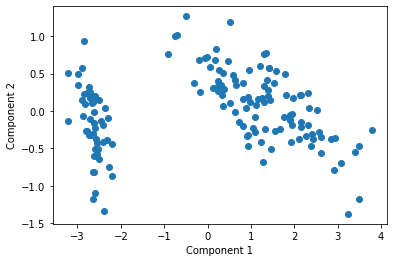

In [75]:
plt.plot(Proj[0], Proj[1], 'o')
plt.xlabel('Component 1')
plt.ylabel('Component 2');

#### 9. Reconstruct data back to the original 4-d coordinate space
I think that the data definitely looks similar to the original data. <br>
Looking at the 2 plots below the graph 'After PCA' follows the same trend as the original data plot with the difference that the points are now more closer together and also the values in the axis have changed but information on the data has remained similar.

In [79]:
ReconstData = np.matmul(Vs[:,0:2], Proj) + np.tile(means, (n,1)).T
ReconstData.shape

(4, 150)

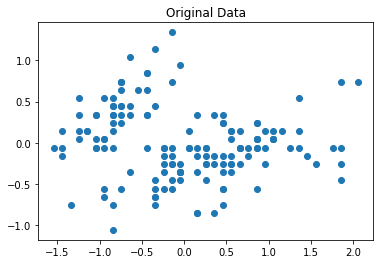

In [89]:
plt.plot(Z[0], Z[1], 'o')
plt.title('Original Data');

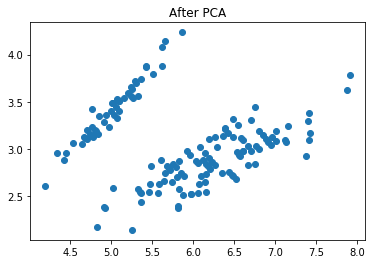

In [90]:
plt.plot(ReconstData[0], ReconstData[1], 'o')
plt.title('After PCA');

# Part 2

In [163]:
## Load the face data
## Each column represents a single face, but the 1600 pixels must be reshaped into a 40x40 image.
facemat = np.loadtxt("faces_40x40_500.csv", delimiter=",")
facemat.shape

(1600, 500)

In [164]:
m, n = facemat.shape

In [165]:
# # Extract the first column
# face1col = facemat[:,0] 

# # Reshape to create a 40x40 image, transpose so it's not sideways
# face1 = face1col.reshape((40,40)).T 

# # Plot using grayscale
# plt.imshow(face1, cmap="gray")

#### 10.  Show the first 25 faces

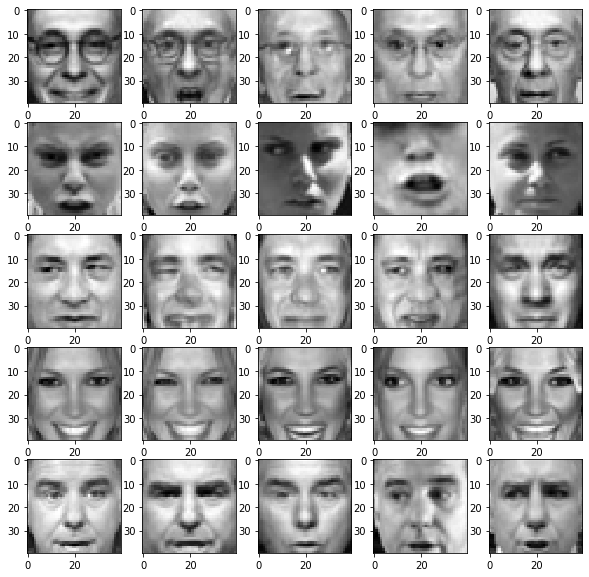

In [166]:
fig, axes = plt.subplots(5, 5, figsize=(10,10))
idx = 0
for x in range(5):
    for y in range(5):
        face = facemat[:,idx]
        face_40x40 = face.reshape((40,40)).T 
        axes[x, y].imshow(face_40x40, cmap="gray")
        idx += 1

#### 11. Calculate the mean (average) face of all 500 faces

In [167]:
means = np.mean(facemat, axis = 1)
means.shape

(1600,)

In [168]:
mean_face = means.reshape((40,40)).T 

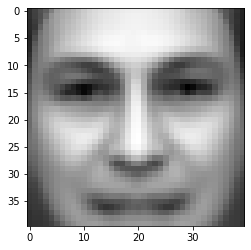

In [169]:
plt.imshow(mean_face, cmap="gray")

#### 12. Create a zero-mean matrix Z from facemat. 

In [170]:
Z = facemat - np.tile(means, (n, 1)).T
Z.shape

(1600, 500)

#### 13. Calculate the covariance matrix of Z.

In [171]:
C = np.matmul(Z, Z.T)/(n - 1)

In [172]:
print('Size of covariance matrix: ' + str(C.shape))

Size of covariance matrix: (1600, 1600)


#### 14. Calculate the eigenvectors (V) and eigenvalues (D) of C.

In [173]:
D, V = np.linalg.eigh(C)

#### 15. Sort the eigenvectors based on the magnitude of their corresponding eigenvalues.

In [174]:
# sort eigenvectors
idx = D.argsort()[::-1] 
Vs = V[:,idx]

In [175]:
Vs.shape

(1600, 1600)

#### 16. Display the top 25 eigen-faces.

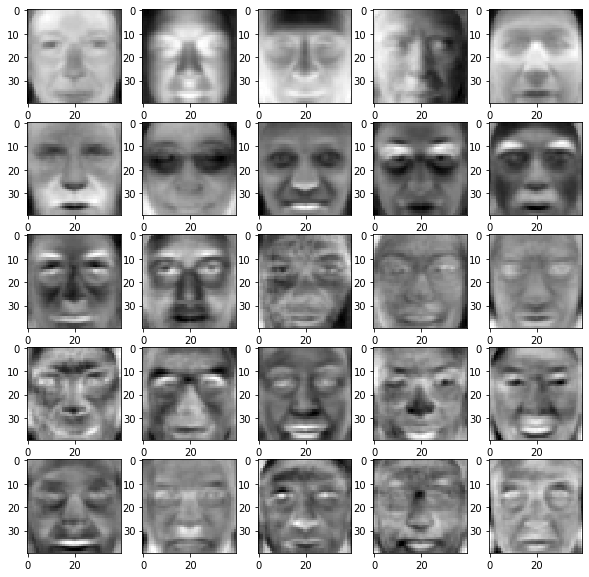

In [228]:
fig, axes = plt.subplots(5, 5, figsize=(10,10))
idx = 0
for x in range(5):
    for y in range(5):
        face = Vs[:,idx]
        face_40x40 = face.reshape((40,40)).T 
        axes[x, y].imshow(face_40x40, cmap="gray")
        idx += 1

#### 17. Reconstruct the faces using varying numbers of principal components.

Looking at the faces below we can observed that the more components we use to reconstruct the data the more clear the image appears. By this I mean that:
- Face 1 can be seen as a more general face without being able to identify a person
- Face 2 starts having more countour and features on the face 
- Face 3 you can start appreciating more the face and you can even tell that the person wears glasses and, 
- Face 4 you can pretty much tell who the person if if you knew them.

In [209]:
components = [20, 40, 80, 120]

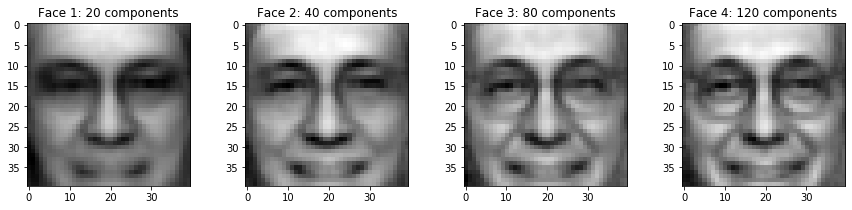

In [217]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))
title = 'Face %d: %d components'
idx = 0
for i in components:
    Proj = np.matmul(Vs[:,0:i].T, Z)
    ReconstData = np.matmul(Vs[:,0:i], Proj) + np.tile(means, (n,1)).T
    face_40x40 = ReconstData[:,0].reshape((40,40)).T
    
    axes[idx].imshow(face_40x40, cmap="gray")
    axes[idx].set_title('Face '+str(idx+1)+': '+str(i)+' components')
    idx += 1

# Extra Credit

In [248]:
# loading file and cheching the shape 
puffin = np.loadtxt("puffin.csv", delimiter=",")
puffin.shape

(1600,)

In [249]:
# converting to 40x40 matrix and displaying 
puffin_40x40 = puffin.reshape(40,40)

In [250]:
# zero mean data 
Z = puffin - means

In [251]:
# project image on 120 component space and reconstructing on pixel space 
Proj = np.matmul(Vs[:,0:120].T, Z)
ReconstData = np.matmul(Vs[:,0:120], Proj) + means
face_40x40 = ReconstData.reshape((40,40)).T

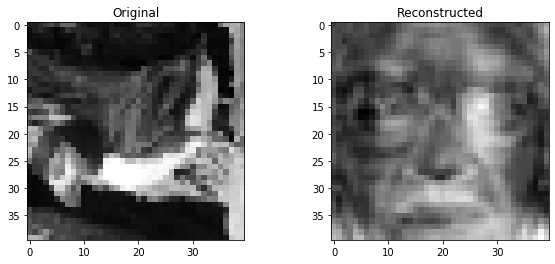

In [252]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(puffin_40x40, cmap="gray")
axes[0].set_title('Original')
axes[1].imshow(face_40x40, cmap="gray")
axes[1].set_title('Reconstructed');

In the original image we cannot appreciate what the image represents. <br>
After running it through the component space that we previously generated using 500 faces we were able to reconstruct the original image into something that resembles a face. 